In [1]:
%matplotlib notebook
import time
import numpy as np
import matplotlib
import matplotlib.animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [2]:
#write the gradient descent for the linear regression
#refactor for least squares, then the loss can be visualized
def least_sq_loss(X, theta_0, theta_1, y, delta=0.1):
    Z = np.zeros((theta_0.shape[0], theta_1.shape[0]))
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            u = np.matrix([theta_0[i], theta_1[j]]).T
            v = np.dot(X, u) - y
            Z[i,j] = np.float(np.dot(v.T, v))
    return 0.5 * Z


In [3]:
#do the visualization
def render_points(X, y, points, delta=0.2, isocline=False, loss=least_sq_loss):
    (theta_0, theta_1) = (np.arange(-5, 5, delta), np.arange(-5, 5, delta))
    J = loss(X, theta_0, theta_1, y, delta=delta)
    T0, T1 = np.meshgrid(theta_0, theta_1)
    if isocline:
        fig, ax = plt.subplots()
        ax.set_title('Gradient Descent')
        CS = ax.contour(T0, T1, J)
    else:
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.set_title('Gradient Descent')
        CS = ax.contour(T0, T1, J, 50)
    
    ax.clabel(CS, inline=1, fontsize=10)
    def animate(i): ax.plot( points[i][0], points[i][1], "or")    
    ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(points), repeat=False)
    return ani

In [4]:
n=25
theta_true = np.random.randn(2,1)
X          = np.matrix(np.random.randn(n,2)@np.diag([1.5,1]))
y          = X@theta_true + 1e-3*np.random.randn(n,1)

<IPython.core.display.Javascript object>


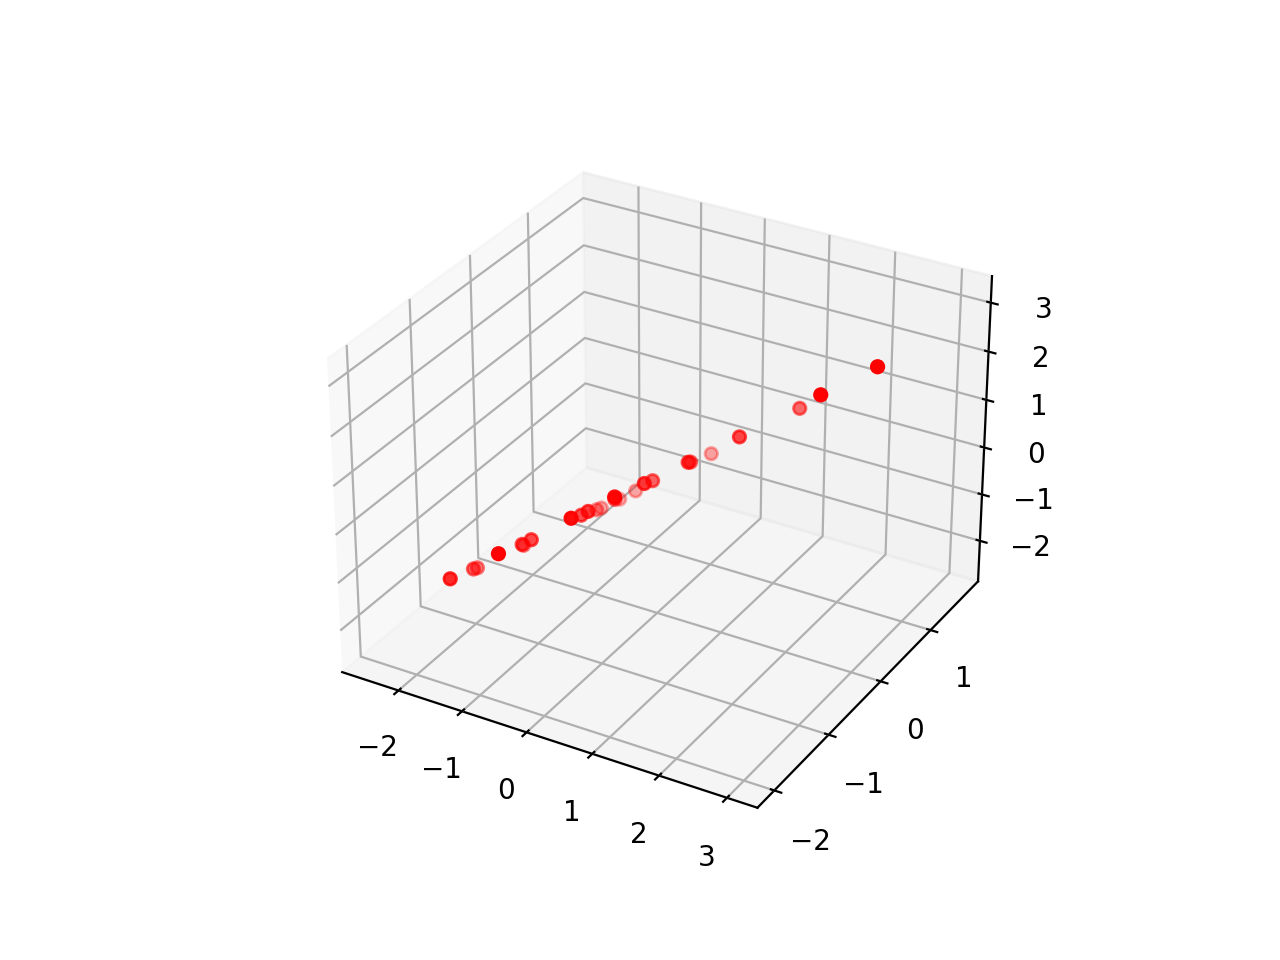

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c="r", marker="o")
plt.show()

<IPython.core.display.Javascript object>


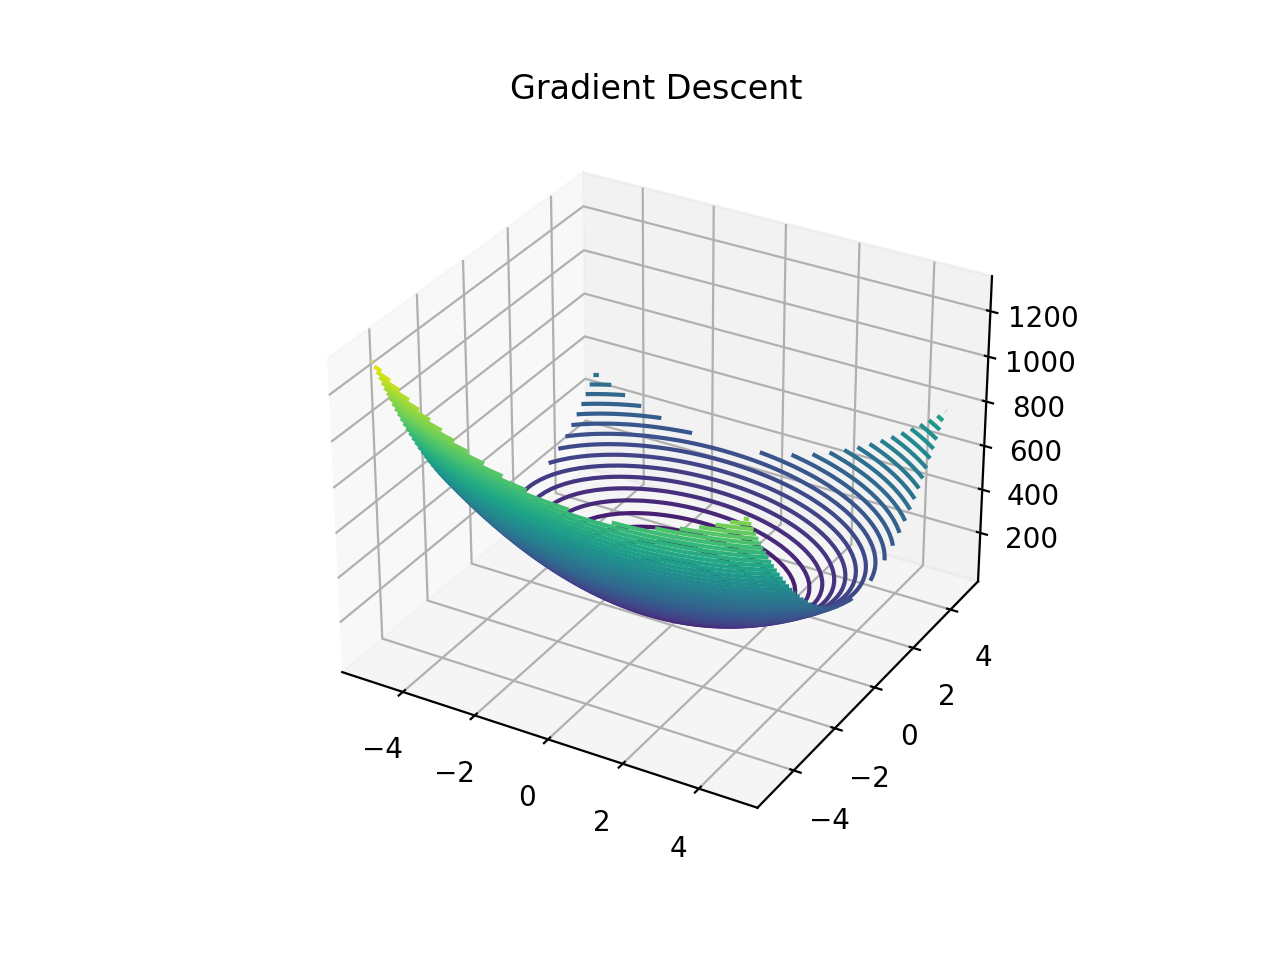

In [6]:
render_points(X,y,[],isocline=False)

<IPython.core.display.Javascript object>


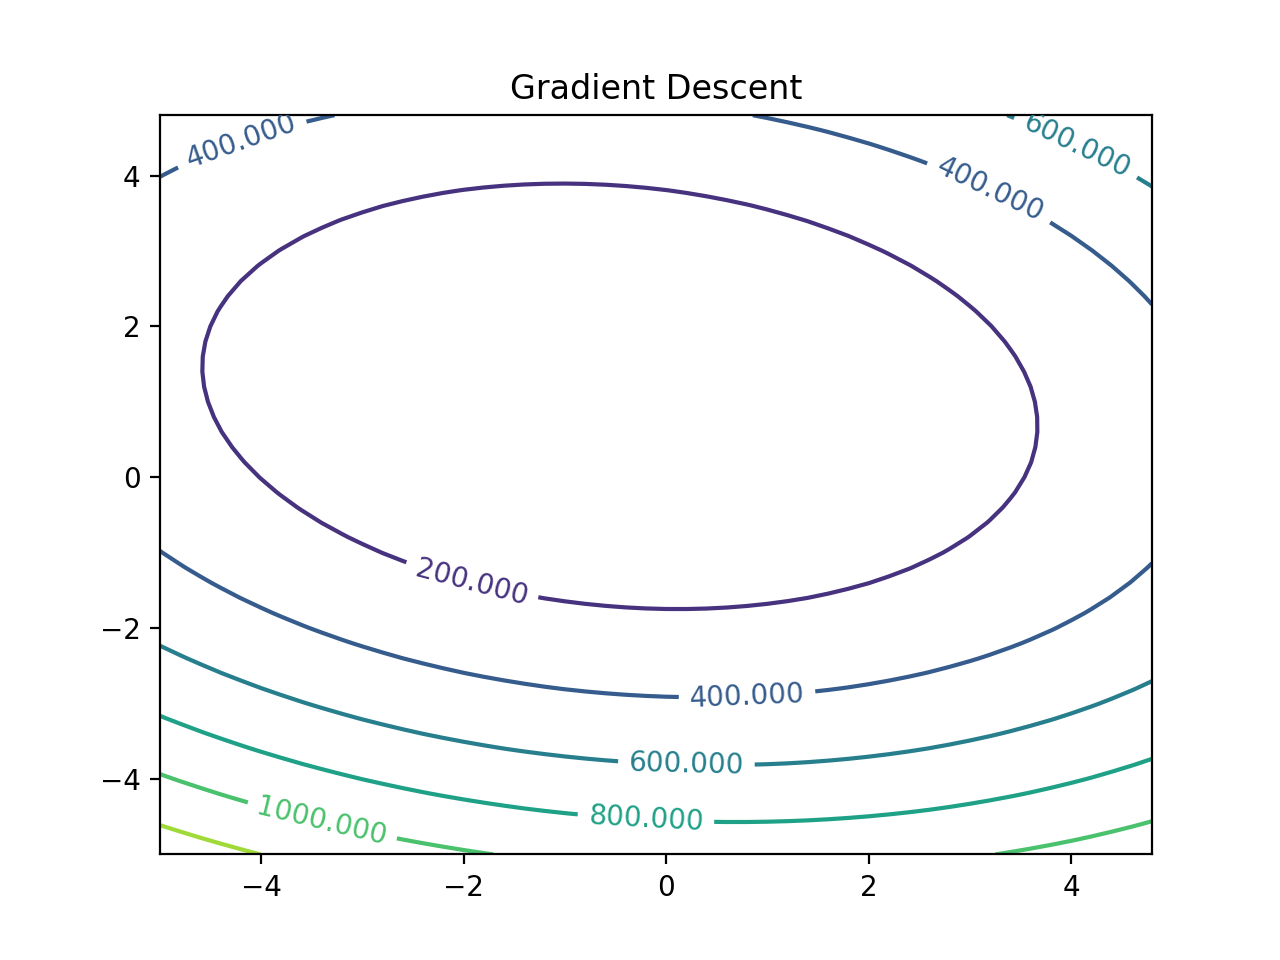

In [7]:
render_points(X,y,[],isocline=True)

<IPython.core.display.Javascript object>


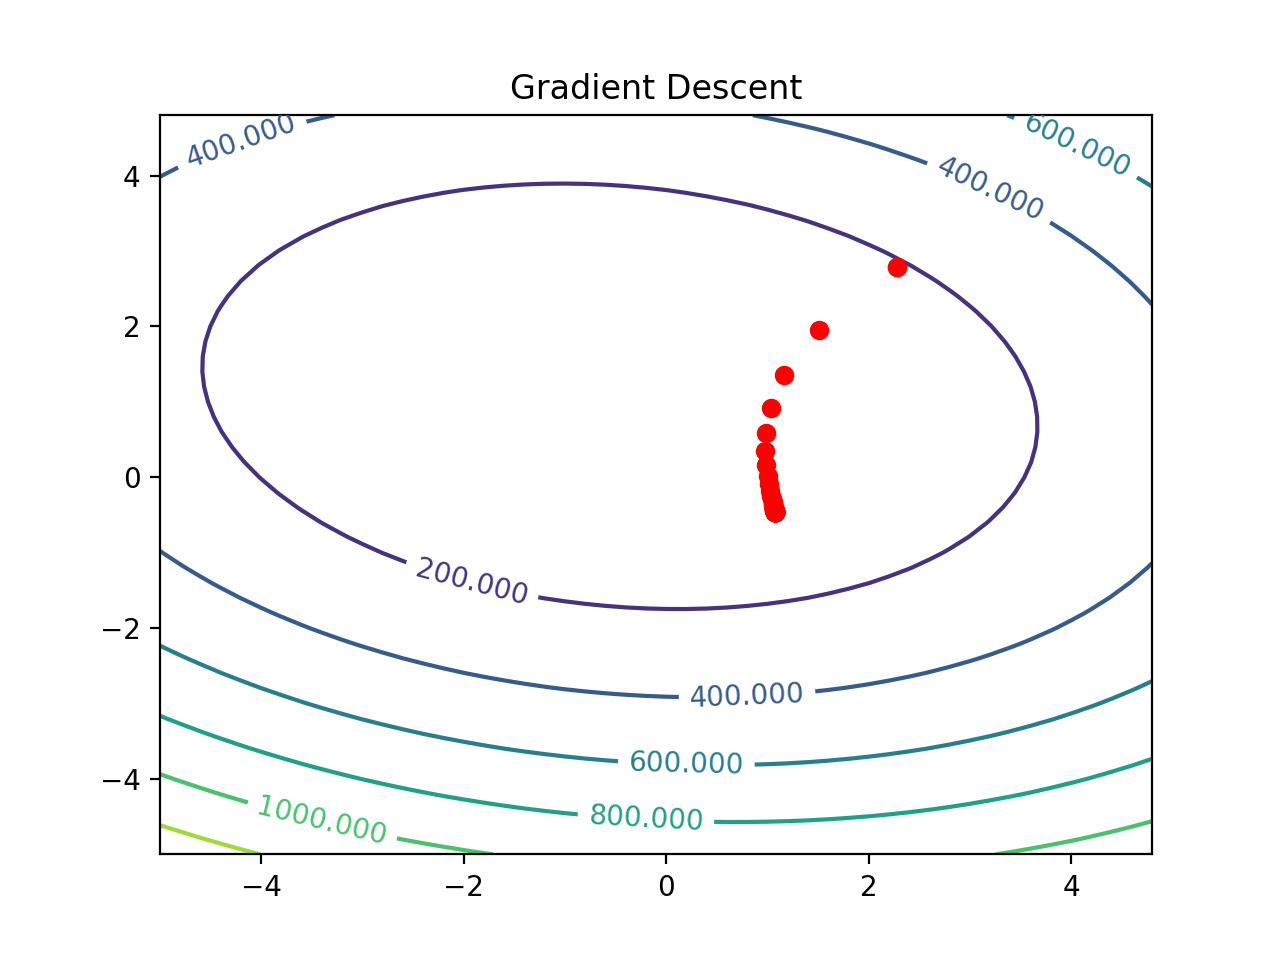

In [8]:
theta = np.matrix([4,4]).T
T = 50
alpha = 0.01
points = []
for t in range(T):
    theta = theta - alpha*X.T@(X@theta-y)
    points.append(theta)
ani = render_points(X,y,points, isocline=True)

<IPython.core.display.Javascript object>


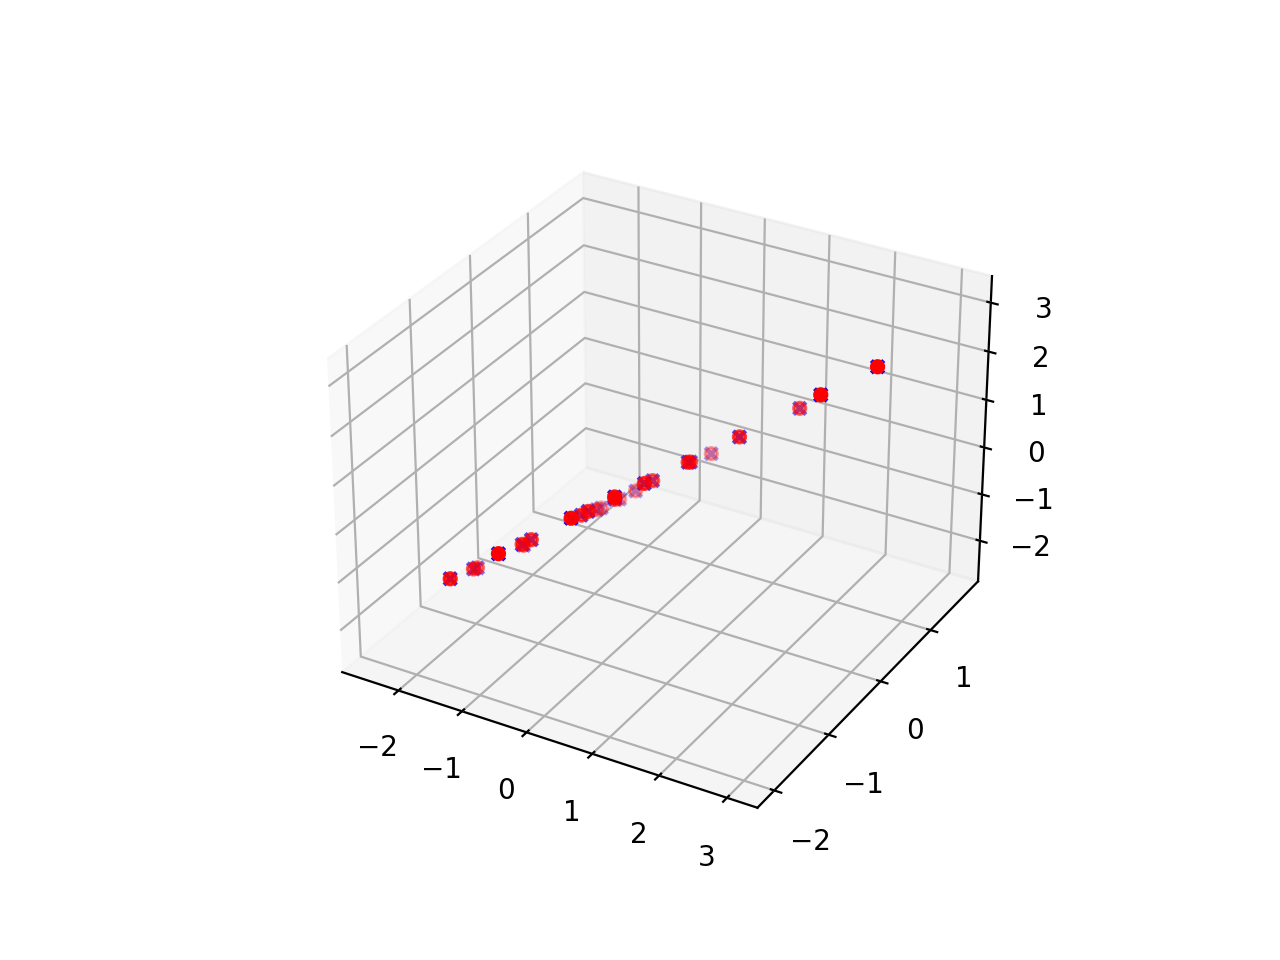

In [9]:
pred = X@theta # predictions
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c="r", marker="o")
ax.scatter(X[:,0], X[:,1], pred, c="b", marker="x")
plt.show()

<IPython.core.display.Javascript object>


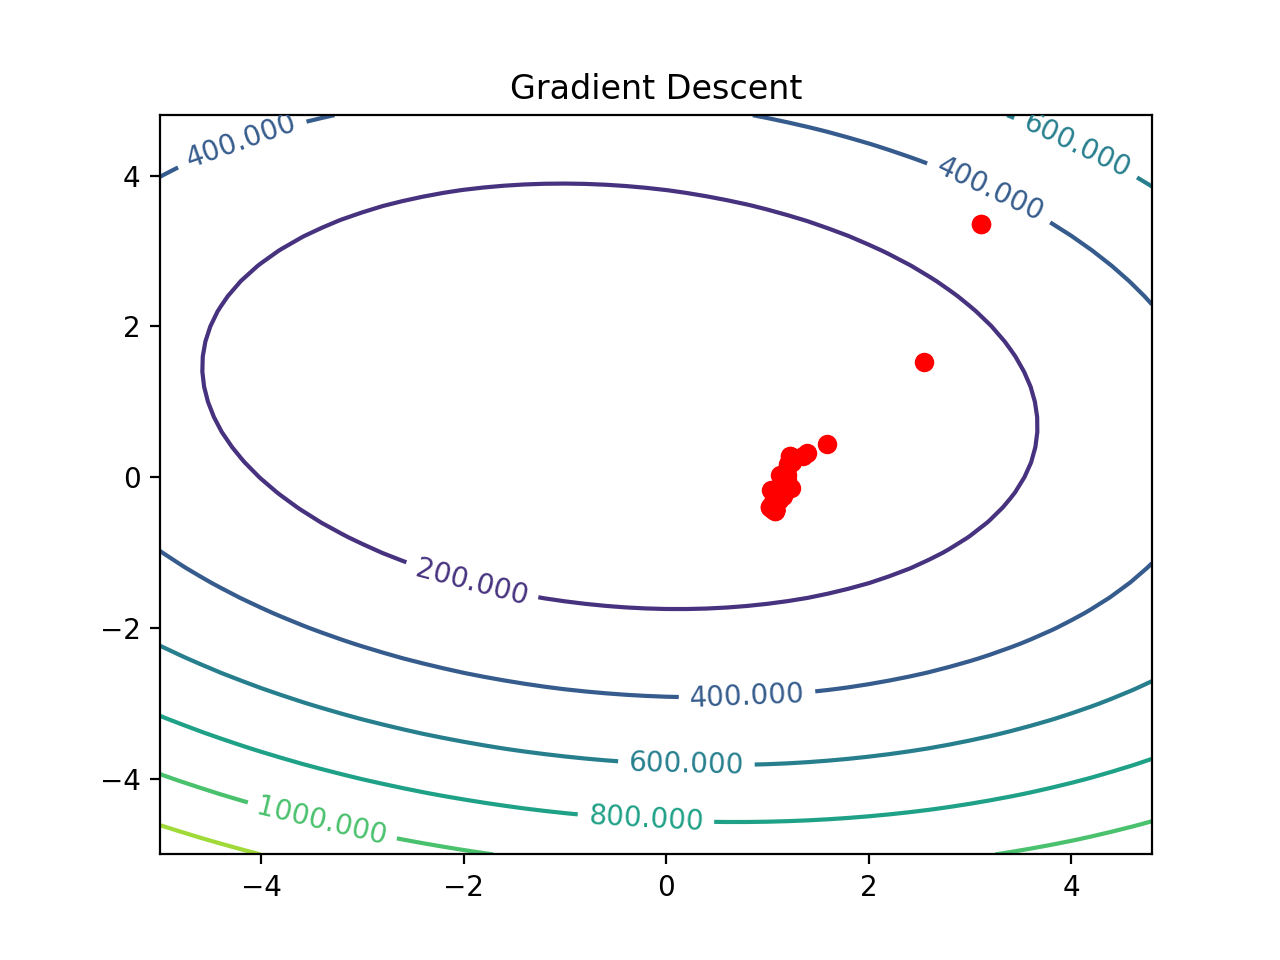

In [12]:
#try to implement the stochastic gradient descent
theta = np.matrix([4,4]).T
T = 50
#shuffle the examples
n = X.shape[0]
perm = np.arange(n)
np.random.shuffle(perm)
points = []
for t in range(T):
    i = t % n
    xi, yi = X[i,:].T, y[i]
    theta = theta - 0.1 * xi * (np.dot(xi.T,theta) - yi)
    points.append(theta)
ani = render_points(X,y,points, isocline = True)
    

<IPython.core.display.Javascript object>


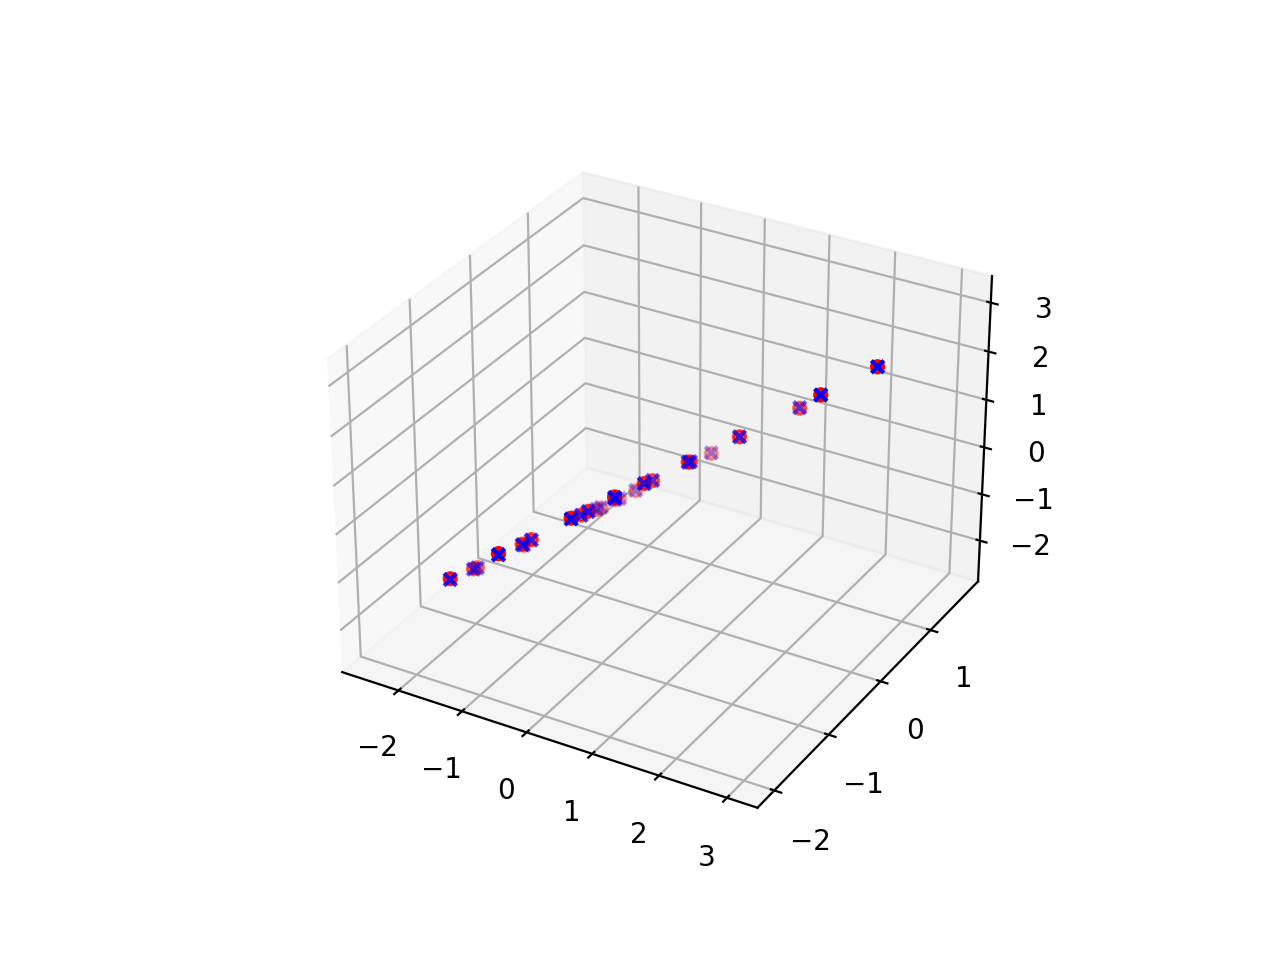

In [13]:
pred = np.dot(X, theta)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c="r", marker="o")
ax.scatter(X[:,0], X[:,1], pred, c="b", marker="x")
plt.show()

<IPython.core.display.Javascript object>


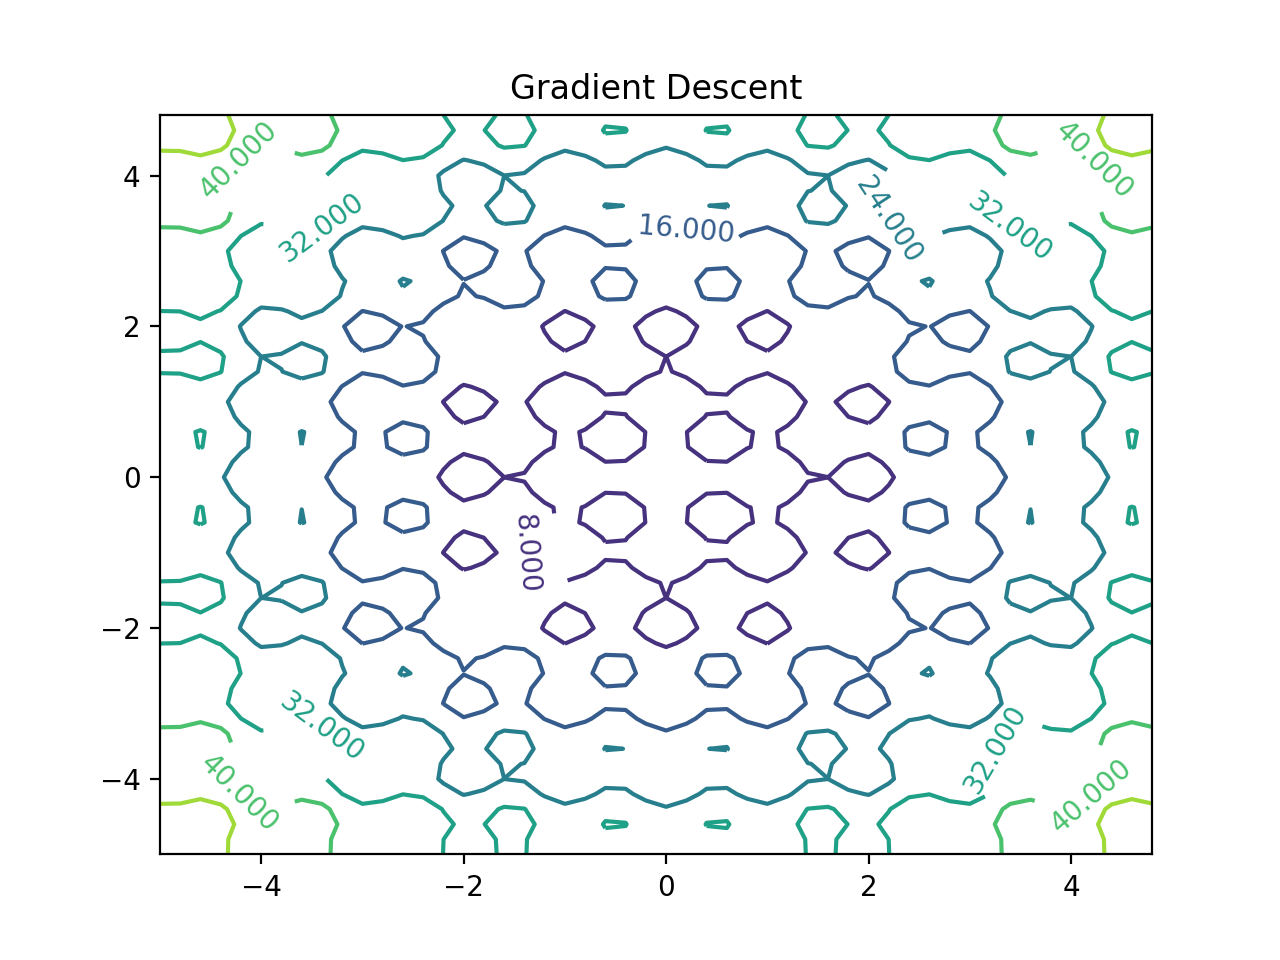

In [14]:
# Convergence
# Sometimes there are some spurious local minima, so it could 
# be unclear what the GD really does
import math
a = 3
def nasty_loss(X, theta_1, theta_2, y, delta=0, a=3):
    points = np.zeros((len(theta_1), len(theta_2)))
    for i, t_1 in enumerate(theta_1):
        for j, t_2 in enumerate(theta_2):
            points[i, j] = 2*a + (t_1**2 - a*math.cos(2*math.pi*t_1) + t_2**2 - a*math.cos(2*math.pi*t_2))
    return points

ani = render_points(X, y, [], isocline=True, loss=nasty_loss)

<IPython.core.display.Javascript object>


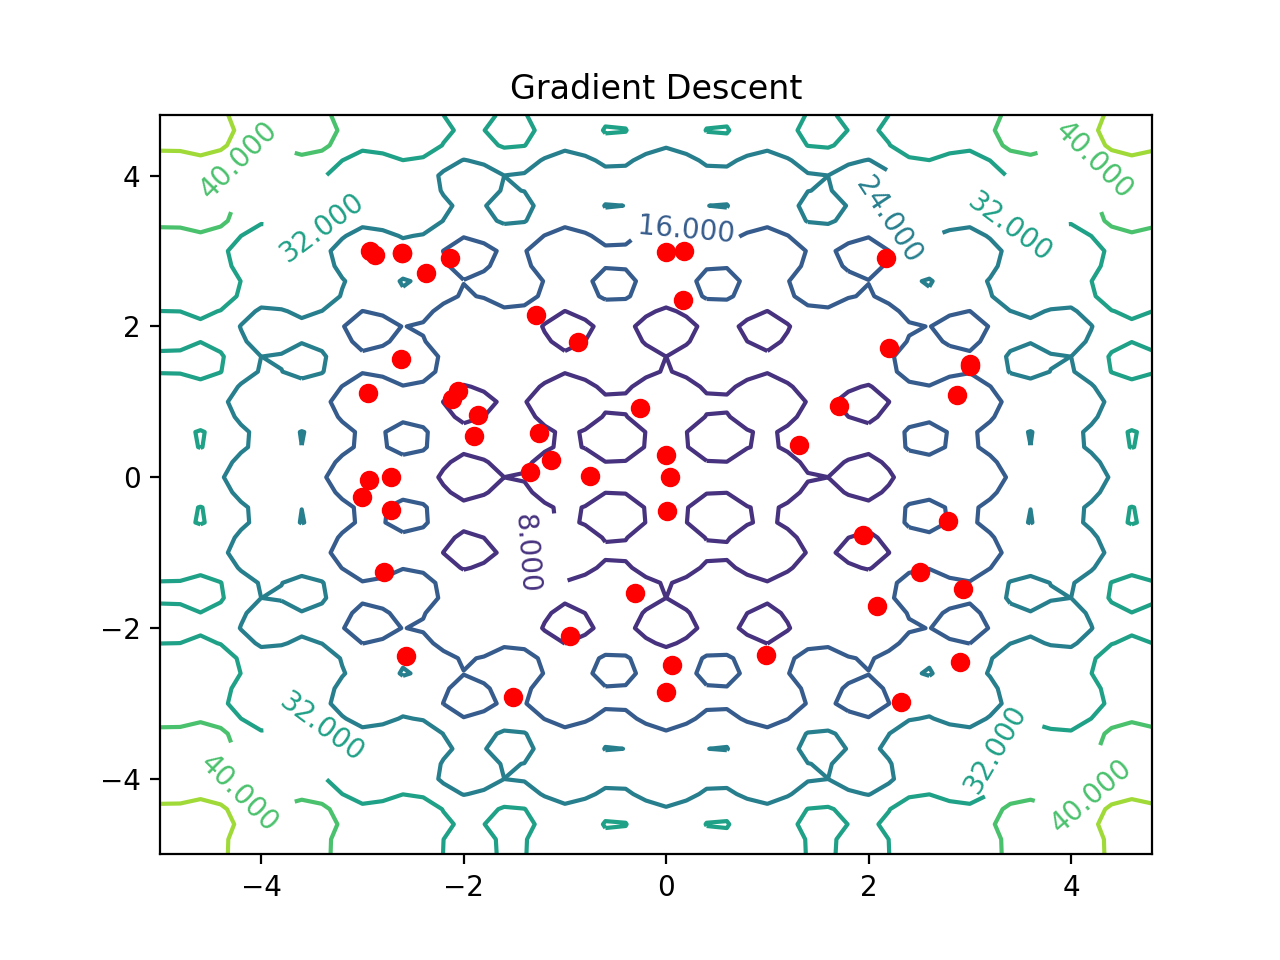

In [15]:
theta = np.matrix(np.random.randn(2,1))
T = 50
alpha = 0.01
points = []
for t in range (T):
    theta = theta - (theta + a*np.sin(2*math.pi*theta))
    points.append(theta)
ani = render_points(X, y, points, isocline=True, loss=nasty_loss)